In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangle as w
import explore as exp
import model as m


warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = w.get_aac()

In [3]:
df = w.clean_aac(df)

In [4]:
# split data

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.split_df(df, "adopted", 3210)

In [5]:
train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((49249, 17),
 (21108, 17),
 (17590, 17),
 (49249, 16),
 (49249,),
 (21108, 16),
 (21108,),
 (17590, 16),
 (17590,))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87947 entries, 20494 to 124490
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal_id      87947 non-null  object
 1   date           87947 non-null  object
 2   breed          87947 non-null  object
 3   color          87947 non-null  object
 4   dob            87947 non-null  object
 5   outcome_age    87947 non-null  int64 
 6   elderly        87947 non-null  int64 
 7   full_grown     87947 non-null  int64 
 8   youngins       87947 non-null  int64 
 9   neutered_male  87947 non-null  int64 
 10  intact_male    87947 non-null  int64 
 11  neutered       87947 non-null  int64 
 12  is_male        87947 non-null  int64 
 13  is_Dog         87947 non-null  uint8 
 14  is_pitbull     87947 non-null  int64 
 15  is_black       87947 non-null  int64 
 16  adopted        87947 non-null  int64 
dtypes: int64(11), object(5), uint8(1)
memory usage: 11.5+ MB


In [5]:
object_cols = w.get_object_cols(df)

In [18]:
object_cols

['animal_id', 'date', 'breed', 'color', 'dob']

In [7]:
df.head()

,animal_id,date,breed,color,dob,outcome_age,elderly,full_grown,youngins,neutered_male,intact_male,neutered,is_male,is_Dog,is_pitbull,is_black,adopted
20494,A663201,2013-10-01,Pit Bull Mix,Brown/White,09/14/2011,2,0,1,0,1,0,1,1,1,1,0,0
40279,A661933,2013-10-01,Domestic Shorthair Mix,Blue Tabby,09/19/2003,10,1,0,0,0,0,1,0,0,0,0,0
85540,A660634,2013-10-01,Domestic Shorthair,Blue/White,07/09/2013,0,0,0,1,0,0,1,0,0,0,0,1
42193,A664271,2013-10-01,Domestic Shorthair Mix,Orange Tabby,09/24/2013,0,0,0,1,0,0,0,0,0,0,0,0
38947,A663546,2013-10-01,American Bulldog Mix,White/Brown Brindle,09/20/2011,2,0,1,0,1,0,1,1,1,0,0,0


In [8]:
cat_vars = ['elderly',
 'full_grown',
 'youngins',
 'neutered_male',
 'intact_male',
 'is_male', 
 'neutered',
 'is_pitbull',
 'is_black',
 'is_Dog',
 'breed', 
 'color']

In [13]:
numeric_cols = w.get_numeric_X_cols(train, object_cols)

In [9]:
quant_vars = ['outcome_age']

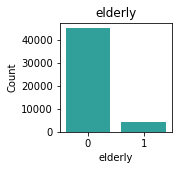

   elderly  Count  Percent
0        0  44900    91.17
1        1   4349     8.83
_________________________________________________________________


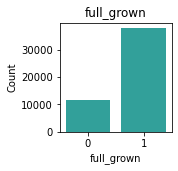

   full_grown  Count  Percent
0           1  37781    76.71
1           0  11468    23.29
_________________________________________________________________


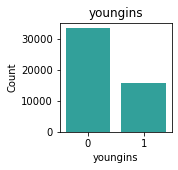

   youngins  Count  Percent
1         0  33432    67.88
0         1  15817    32.12
_________________________________________________________________


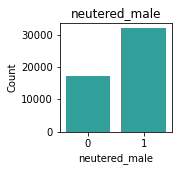

   neutered_male  Count  Percent
0              1  31931    64.84
1              0  17318    35.16
_________________________________________________________________


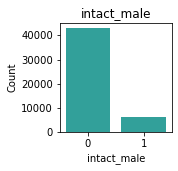

   intact_male  Count  Percent
0            0  42931    87.17
1            1   6318    12.83
_________________________________________________________________


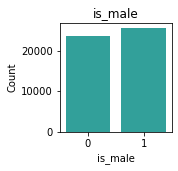

   is_male  Count  Percent
0        1  25613    52.01
1        0  23636    47.99
_________________________________________________________________


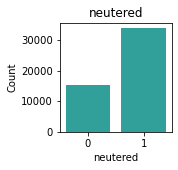

   neutered  Count  Percent
1         1  33825    68.68
0         0  15424    31.32
_________________________________________________________________


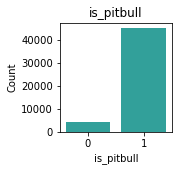

   is_pitbull  Count  Percent
0           1  45141    91.66
1           0   4108     8.34
_________________________________________________________________


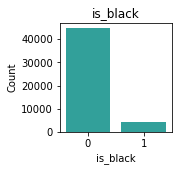

   is_black  Count  Percent
0         0  44763    90.89
1         1   4486     9.11
_________________________________________________________________


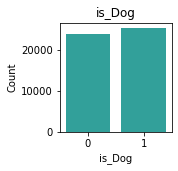

   is_Dog  Count  Percent
1       1  25336    51.44
0       0  23913    48.56
_________________________________________________________________


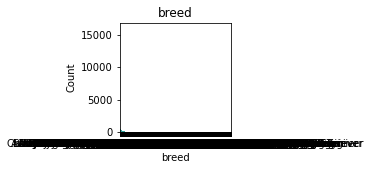

                                                                 breed  Count  \
Domestic Shorthair Mix                                    Pit Bull Mix  16046   
Domestic Shorthair                             Chihuahua Shorthair Mix   3591   
Labrador Retriever Mix                          Domestic Shorthair Mix   2621   
Pit Bull Mix                                     Domestic Longhair Mix   2601   
Chihuahua Shorthair Mix                             Domestic Shorthair   2479   
...                                                                ...    ...   
Rottweiler/Blue Lacy                 Australian Shepherd/Cavalier Span      1   
Cavalier Span/Toy Poodle                     Pbgv/Jack Russell Terrier      1   
Pekingese/Boston Terrier                         Rat Terrier/Pekingese      1   
Samoyed                                     Chinese Sharpei/Rottweiler      1   
Irish Wolfhound/Australian Shepherd                    Harrier/Pointer      1   

                           

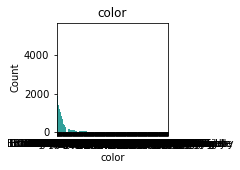

                                       color  Count  Percent
Black/White                      Brown/White   5411    10.99
Black                               Tricolor   4486     9.11
Brown Tabby                Brown Tabby/White   3581     7.27
Brown Tabby/White                  Tan/White   1862     3.78
Orange Tabby                     White/Brown   1733     3.52
...                                      ...    ...      ...
Tricolor/Orange            Black/Brown Merle      1     0.00
Brown Tabby/Agouti        Black/Silver Tabby      1     0.00
Blue Tabby/Tortie   Blue Merle/Brown Brindle      1     0.00
Liver/Chocolate                Apricot/Brown      1     0.00
Brown/Red Tick                   Blue/Silver      1     0.00

[436 rows x 3 columns]
_________________________________________________________________


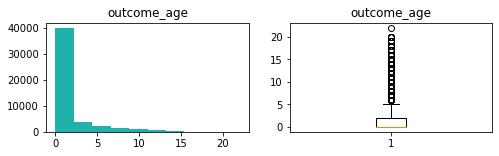

count    49249.000000
mean         1.585636
std          2.701373
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: outcome_age, dtype: float64


In [10]:
exp.explore_univariate(train, cat_vars, quant_vars)

elderly 
_____________________

        chi2       p-value  degrees of freedom
0  55.281945  1.044234e-13                   1

observed:
 adopted      0      1    All
elderly                     
0        20171  24729  44900
1         2210   2139   4349
All      22381  26868  49249

expected:
               0             1
0  20404.615322  24495.384678
1   1976.384678   2372.615322


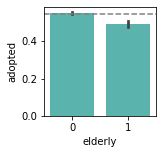


_____________________

full_grown 
_____________________

        chi2       p-value  degrees of freedom
0  39.876084  2.705962e-10                   1

observed:
 adopted         0      1    All
full_grown                     
0           16874  20907  37781
1            5507   5961  11468
All         22381  26868  49249

expected:
               0             1
0  17169.415846  20611.584154
1   5211.584154   6256.415846


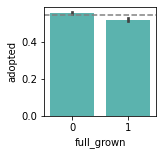


_____________________

youngins 
_____________________

         chi2       p-value  degrees of freedom
0  104.937849  1.260275e-24                   1

observed:
 adopted       0      1    All
youngins                     
0          7717   8100  15817
1         14664  18768  33432
All       22381  26868  49249

expected:
               0             1
0   7187.968832   8629.031168
1  15193.031168  18238.968832


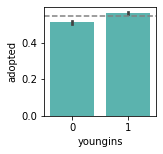


_____________________

neutered_male 
_____________________

          chi2  p-value  degrees of freedom
0  4444.859964      0.0                   1

observed:
 adopted            0      1    All
neutered_male                     
0              18029  13902  31931
1               4352  12966  17318
All            22381  26868  49249

expected:
               0             1
0  14510.908059  17420.091941
1   7870.091941   9447.908059


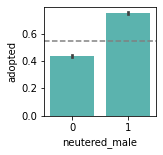


_____________________

intact_male 
_____________________

          chi2  p-value  degrees of freedom
0  6531.260955      0.0                   1

observed:
 adopted          0      1    All
intact_male                     
0            16523  26408  42931
1             5858    460   6318
All          22381  26868  49249

expected:
              0            1
0  19509.81159  23421.18841
1   2871.18841   3446.81159


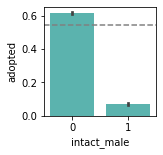


_____________________

is_male 
_____________________

       chi2       p-value  degrees of freedom
0  92.44271  6.930222e-22                   1

observed:
 adopted      0      1    All
is_male                     
0        12171  13442  25613
1        10210  13426  23636
All      22381  26868  49249

expected:
               0             1
0  11639.719649  13973.280351
1  10741.280351  12894.719649


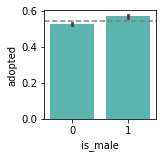


_____________________

neutered 
_____________________

           chi2  p-value  degrees of freedom
0  21020.122075      0.0                   1

observed:
 adopted       0      1    All
neutered                     
0         14440    984  15424
1          7941  25884  33825
All       22381  26868  49249

expected:
               0             1
0   7009.371642   8414.628358
1  15371.628358  18453.371642


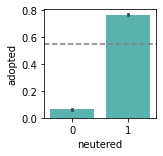


_____________________

is_pitbull 
_____________________

       chi2   p-value  degrees of freedom
0  9.138485  0.002503                   1

observed:
 adopted         0      1    All
is_pitbull                     
0           20607  24534  45141
1            1774   2334   4108
All         22381  26868  49249

expected:
               0             1
0  20514.136754  24626.863246
1   1866.863246   2241.136754


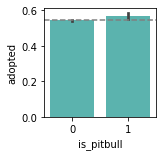


_____________________

is_black 
_____________________

        chi2       p-value  degrees of freedom
0  69.918599  6.180294e-17                   1

observed:
 adopted       0      1    All
is_black                     
0         20076  24687  44763
1          2305   2181   4486
All       22381  26868  49249

expected:
               0             1
0  20342.356251  24420.643749
1   2038.643749   2447.356251


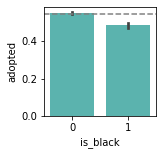


_____________________

is_Dog 
_____________________

          chi2        p-value  degrees of freedom
0  1042.732041  9.248099e-229                   1

observed:
 adopted      0      1    All
is_Dog                      
0        12651  11262  23913
1         9730  15606  25336
All      22381  26868  49249

expected:
               0             1
0  10867.161831  13045.838169
1  11513.838169  13822.161831


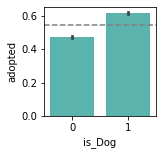


_____________________

breed 
_____________________

          chi2        p-value  degrees of freedom
0  3595.771513  6.066603e-148                1639

observed:
 adopted                                            0      1    All
breed                                                             
Abyssinian                                         2      3      5
Abyssinian Mix                                     2      3      5
Affenpinscher                                      0      1      1
Affenpinscher Mix                                  0      3      3
Airedale Terrier                                   0      1      1
...                                              ...    ...    ...
Yorkshire Terrier/Rat Terrier                      2      3      5
Yorkshire Terrier/Soft Coated Wheaten Terrier      0      1      1
Yorkshire Terrier/Standard Poodle                  0      1      1
Yorkshire Terrier/Toy Poodle                       1      3      4
All                           

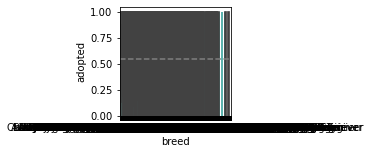


_____________________

color 
_____________________

          chi2        p-value  degrees of freedom
0  1457.615029  1.669007e-110                 435

observed:
 adopted                  0      1    All
color                                   
Agouti                   2      5      7
Agouti/White             1      0      1
Apricot                 10     13     23
Apricot/Brown            1      0      1
Apricot/White            1      2      3
...                    ...    ...    ...
Yellow/Orange            2      1      3
Yellow/Orange Tabby      1      0      1
Yellow/Tan               3      0      3
Yellow/White            16     34     50
All                  22381  26868  49249

[437 rows x 3 columns]

expected:
              0          1
0     3.181120   3.818880
1     0.454446   0.545554
2    10.452253  12.547747
3     0.454446   0.545554
4     1.363337   1.636663
..         ...        ...
431   0.454446   0.545554
432   1.363337   1.636663
433   0.454446   0.545554
434  

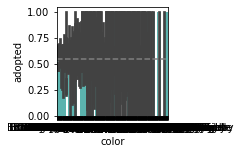


_____________________

outcome_age 
____________________



KeyboardInterrupt: 

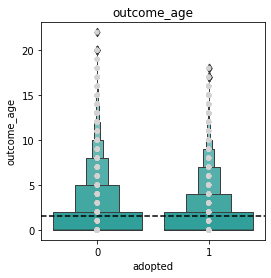

In [11]:
target = 'adopted'

exp.explore_bivariate(train, target, cat_vars, quant_vars)

In [16]:
cols = ['outcome_age', 'elderly', 'full_grown', 'youngins', 'neutered_male', 'intact_male', 'neutered', 'is_pitbull', 'is_black', 'is_Dog']

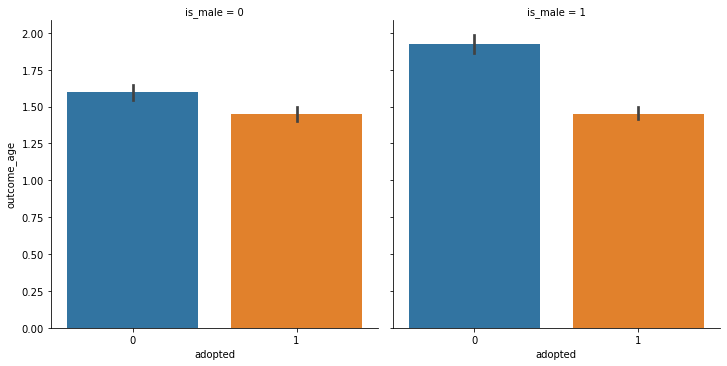

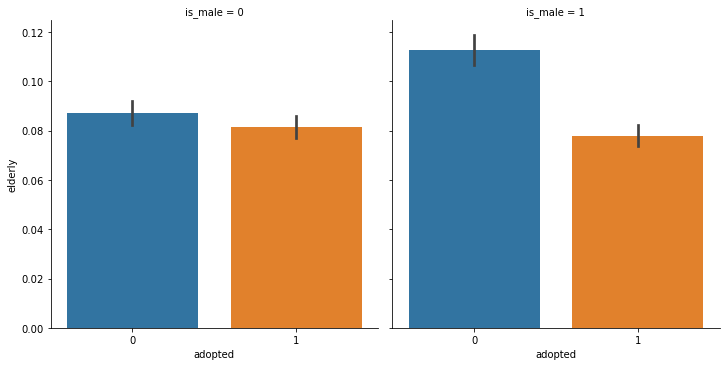

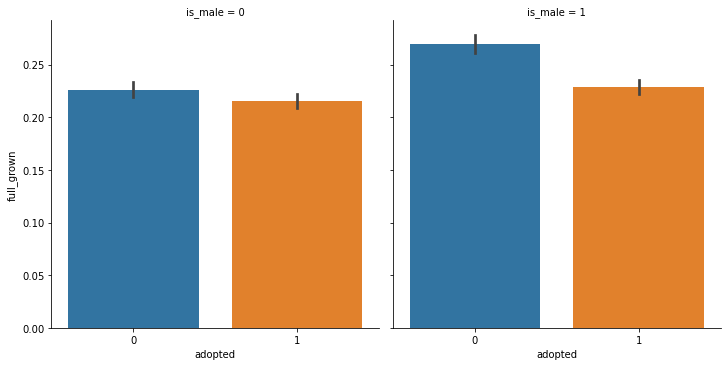

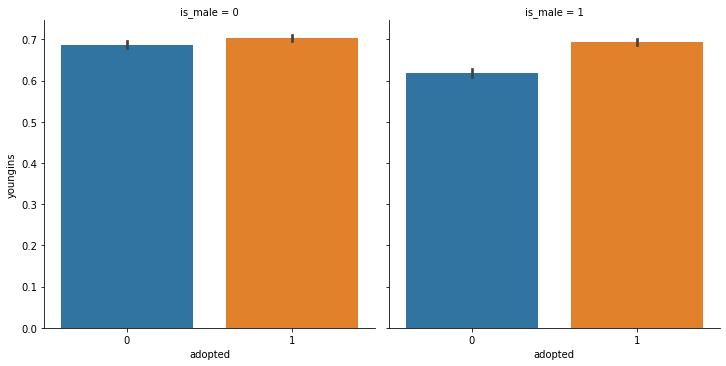

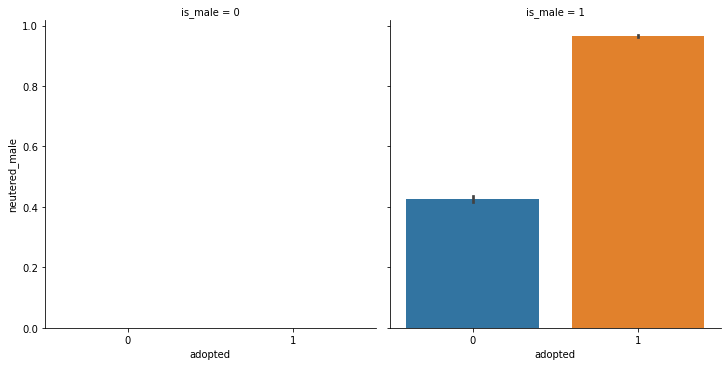

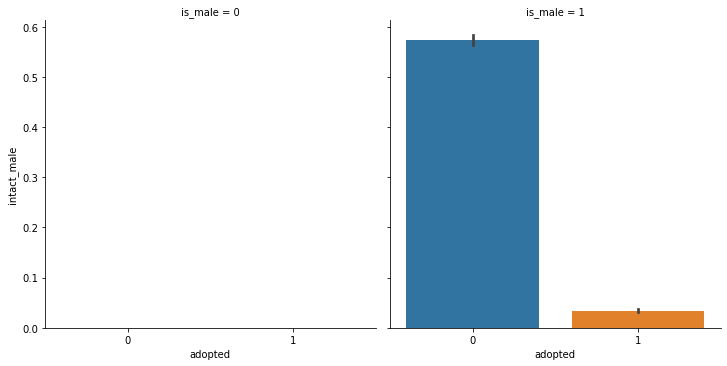

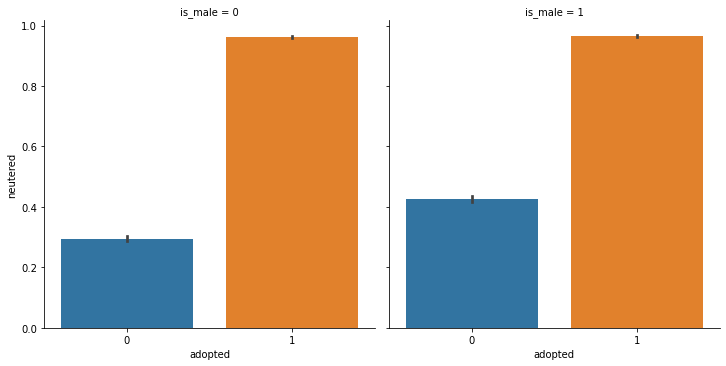

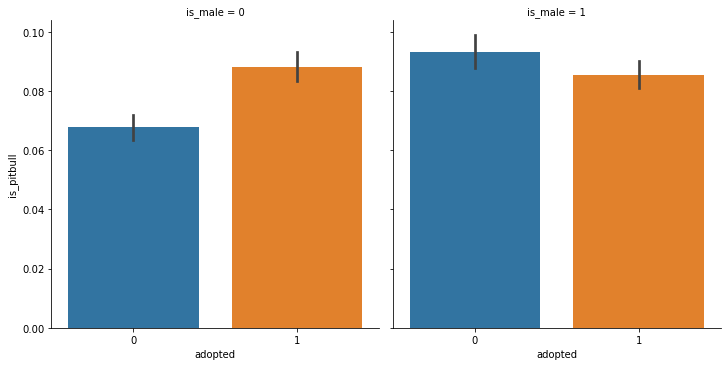

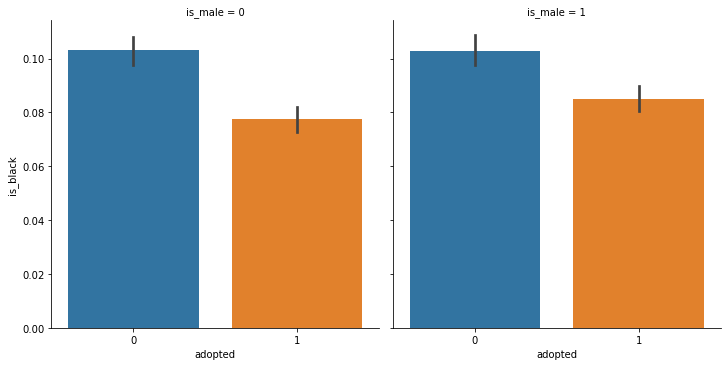

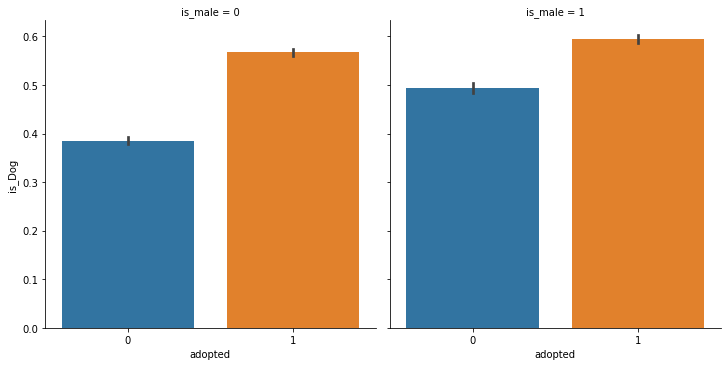

In [17]:
for col in cols:
    g = sns.catplot(x="adopted", y=col, kind="bar", col="is_male", data=train)


In [18]:
cols = ['elderly', 'full_grown', 'youngins', 'neutered_male', 'intact_male', 'neutered', 'is_black', 'is_Dog']

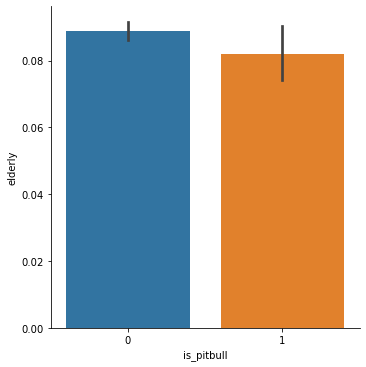

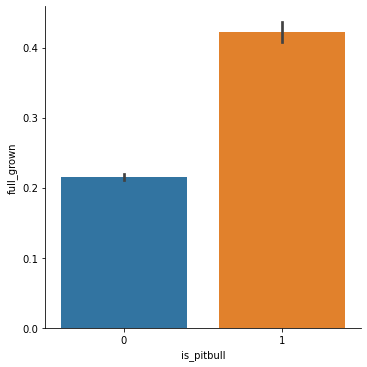

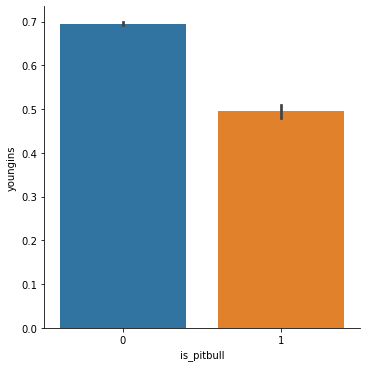

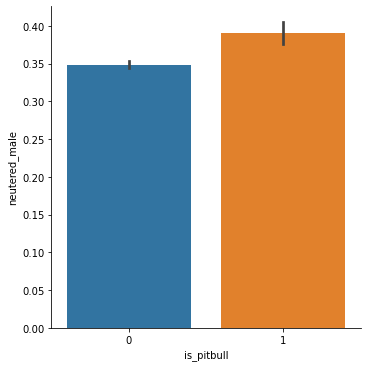

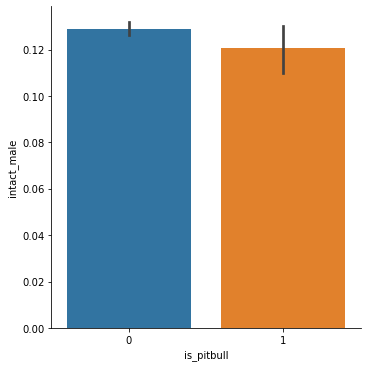

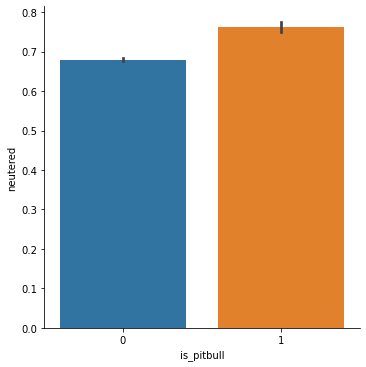

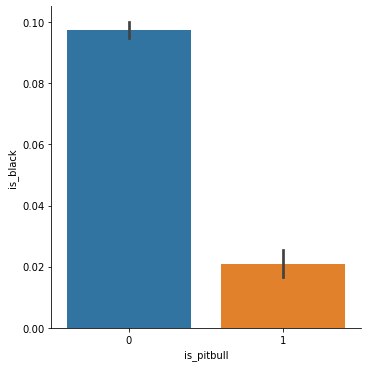

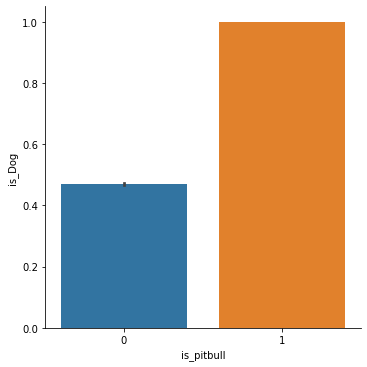

In [19]:
for col in cols:
    g = sns.catplot(x='is_pitbull', y=col, kind="bar", data=train)

# Hypotheses Testing

hypothesis1: age affects adoption